<a href="https://colab.research.google.com/github/Lexie-v2/Goggle-CO/blob/main/Lab9_Redes_Neuronales_Vera_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTELIGENCIA ARTIFICIA, PRINCIPIOS Y TECNICAS

#Laboratorio 9: Redes Neuronales y Deep Learning


##Caso 1:
¿Què hace el código?

In [ ]:
#Tratamiento de datos
#----------------------------------------------------------------------------------------------------
import numpy as np
import pandas as pd

#Graficos
#----------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

#Modelado
#----------------------------------------------------------------------------------------------------
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

#Configuracion warnings
#----------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')


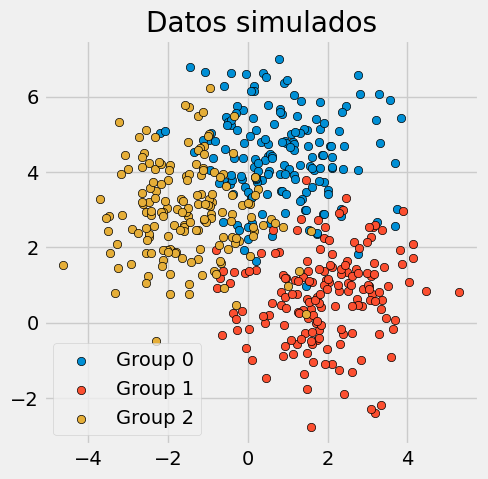

In [ ]:
#Datos Simulados
#----------------------------------------------------------------------------------------------------
X, y = make_blobs(
        n_samples=500,
        n_features=2,
        centers=3,
        cluster_std=1.2,
        shuffle=True,
        random_state = 0
)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in np.unique(y):
  ax.scatter(
      x=X[y==i, 0],
      y=X[y==i, 1],
      c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
      marker = 'o',
      edgecolor = 'black',
      label= f"Group {i}"
  )

ax.set_title('Datos simulados')
ax.legend();

In [ ]:
#Modelos
#----------------------------------------------------------------------------------------------------
modelo_1 = MLPClassifier(
               hidden_layer_sizes=(5),
               learning_rate_init=0.01,
               solver = 'lbfgs' ,
               max_iter = 1000,
               random_state = 123
            )

modelo_2 = MLPClassifier(
               hidden_layer_sizes=(10),
               learning_rate_init=0.01,
               solver = 'lbfgs' ,
               max_iter = 1000,
               random_state = 123
            )

modelo_3 = MLPClassifier(
               hidden_layer_sizes=(20, 20),
               learning_rate_init=0.01,
               solver = 'lbfgs' ,
               max_iter = 5000,
               random_state = 123
            )

modelo_4 = MLPClassifier(
               hidden_layer_sizes=(50, 50, 50),
               learning_rate_init=0.01,
               solver = 'lbfgs' ,
               max_iter = 5000,
               random_state = 123
            )

modelo_1.fit(X=X, y=y)
modelo_2.fit(X=X, y=y)
modelo_3.fit(X=X, y=y)
modelo_4.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

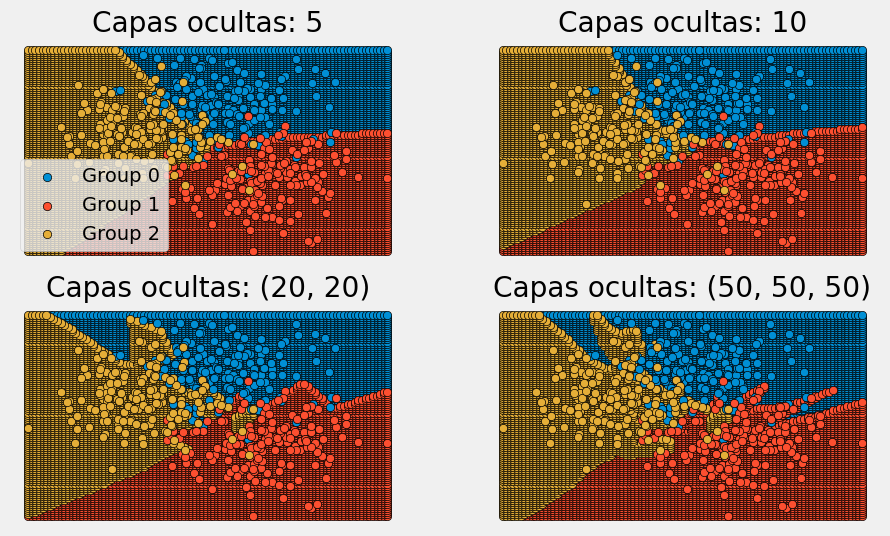

In [ ]:
#Grafico de predicciones
#----------------------------------------------------------------------------------------------------
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, modelo in enumerate([modelo_1, modelo_2, modelo_3, modelo_4]):

    predicciones = modelo.predict(X_grid)

    for j in np.unique(predicciones):
      axs[i].scatter(
          x=X_grid[predicciones == j,0],
          y=X_grid[predicciones == j,1],
          c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
          marker = 'o',
          edgecolor = 'black',
          label= f"Group {j}"
      )

    for j in np.unique(y):
      axs[i].scatter(
          x=X[y==j, 0],
          y=X[y==j, 1],
          c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
          marker = 'o',
          edgecolor = 'black'
      )

    axs[i].set_title(f"Capas ocultas: {modelo.hidden_layer_sizes}")
    axs[i].axis('off')
axs[0].legend();

In [ ]:
#Numero de neuronas
#----------------------------------------------------------------------------------------------------
param_grid = {'hidden_layer_sizes': [(5), (10), (20, 20), (50, 50, 50)]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                     learning_rate_init=0.01,
                     solver = 'lbfgs',
                     alpha = 0,
                     max_iter = 5000,
                    random_state = 123
                   ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
        )

_ = grid.fit(X, y)
_

GridSearchCV(cv=5,
             estimator=MLPClassifier(alpha=0, learning_rate_init=0.01,
                                     max_iter=5000, random_state=123,
                                     solver='lbfgs'),
             param_grid={'hidden_layer_sizes': [5, 10, (20, 20), (50, 50, 50)]},
             return_train_score=True, scoring='accuracy')

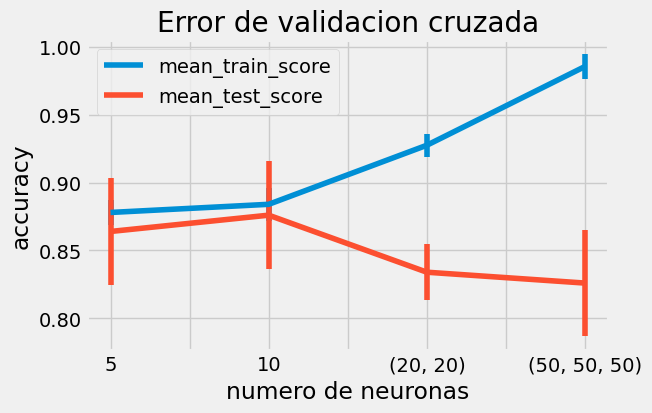

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('numero de neuronas')
ax.set_title('Error de validacion cruzada');


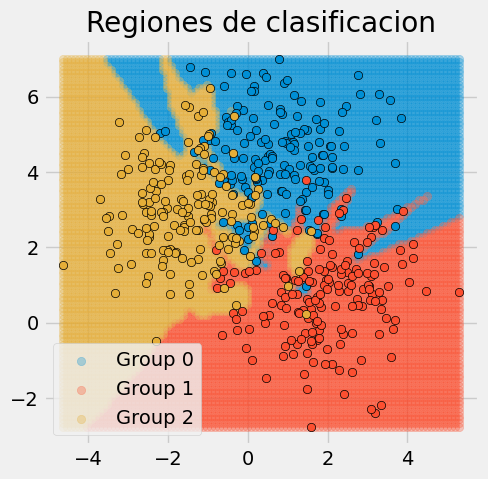

In [ ]:
#Espacio de busqueda de cada hiperparametro
#----------------------------------------------------------------------------------------------------
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20,)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1]
}

#Busqueda por validacion cruzada
#----------------------------------------------------------------------------------------------------
grid = RandomizedSearchCV(
        estimator = MLPClassifier(solver = 'lbfgs', max_iter = 2000),
        param_distributions = param_distributions,
        n_iter = 50, #numero maximo de combnaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3,
        verbose    = 0,
        random_state = 123,
        return_train_score = True,
)

grid.fit(X = X, y = y)

#Resultados del grid
#----------------------------------------------------------------------------------------------------
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
     .drop(columns = 'params')\
     .sort_values('mean_test_score', ascending = False)\
     .head(10)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for i in np.unique(predicciones):
    ax.scatter(
        x = X_grid[predicciones == i, 0],
        y = X_grid[predicciones == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        #marker = 'o',
        alpha = 0.3,
        label = f"Group {i}"
    )

for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker = 'o',
        edgecolor = 'black'
    )

ax.set_title('Regiones de clasificacion')
ax.legend();

##Caso 2: Predicción de precios vivienda

Para este caso se usarpa el set de datos SaratogaHouses del paquete mosaicData de R contiene información sore el precio de 1728 viviendas situadas en Saratoga Country, New York, USA en el año 2006. Además del precio, incluye 15 variables adicionales:

*   price: precio de la vivienda
*   lotSize: metros cuadrados de la vivienda
*   age: antigüedad de la vivienda
*   landValue: valor del terreno
*   livingArea: metros cuadrados habitables
*   pctCollege: porcentaje del vecindario con titulo universitario
*   bedrooms: número de dormitorios
*   firplaces: número de chimeneas
*   bathrooms: número de cuartos de bao (el valor 0.5 hace referncia a cuartos de baño sin ducha)
*   rooms: número de habitaciones
*   heating: tipo de calefacción
*   fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel)
*   sewer: tió de desagüe
*   waterfront: si la vivienda tiene vistas al lago
*   newConstruccion: si la vivienda es de nueva construcción
*   centralAir: si la vivienda tiene aire acondicionado

El objetivo es obtener un modelo capaz de predecir el precio del alquiler



In [ ]:
#Tratamiento de datos
#----------------------------------------------------------------------------------------------------
import numpy as np
import pandas as pd

#Gráficos
#----------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

#Modelado
#----------------------------------------------------------------------------------------------------
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

#Configuración warnings
#----------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

#Descarga de datos
#----------------------------------------------------------------------------------------------------
url = ("https://raw.githubusercontent.com/JoaquinAmatRodrigo/"
       "Estadistica-machine-learning-python/master/data/SaratogaHouses.csv")
datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios",
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

datos.head(5)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


Análisis Exploratorio

Antes de entrenar un modelo predictivo, o incluso antes de realizar calquier cálculo con un nuevo conjnto de datos, es importante realizar una exploración descriptiva de los mismos. Este proceso permite entender mejor que información contiene cada variable, asi como detectar posibles errores. Alguno sejemplos frecuentes son:

*   Que una columna se haya ala,cenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.

*   Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0  o un espacio en blanco.

*   Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.

Además, este análisis inicial puede dar pistas dobre qué variables son adecuadas como predictores en un modelo.



In [ ]:
# Tipo de cada columna
#----------------------------------------------------------------------------------------------------
# En pandas, el tipo "object" hace referencia a strings
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

Todas las columnas tienen el tipo de dato correcto

In [ ]:
#Número de datos ausentes por variable
#----------------------------------------------------------------------------------------------------
datos.isna().sum().sort_values()

,0
precio,0
metros_totales,0
antiguedad,0
precio_terreno,0
metros_habitables,0
universitarios,0
dormitorios,0
chimenea,0
banyos,0
habitaciones,0


Todas la columnas están completas, no hay valores ausentes

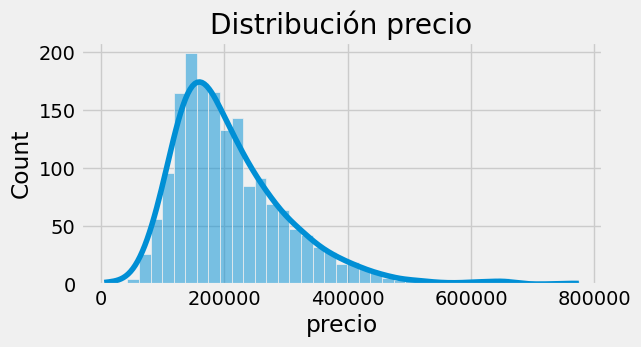

In [ ]:
#Distribución variable respuesta
#----------------------------------------------------------------------------------------------------
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=datos, x='precio', kde=True, ax=ax)
ax.set_title("Distribución precio")
ax.set_xlabel('precio');

Los modelos de redes neuroanles son de tipo no paramétrico, no asumen ningún tipo de distribución de la variable respuesta, por lo tanto, no es necesario que esta siga ninguna distribución concreta (normal, gamma...). Aún así, simepre es recomendable hacer un estudio minimo, ya que, a fin de cuentas, es lo que interesa predecir. En este caso, la variable precio tiene una distribucion asimetrica con una cola positiva debido a que, unas pocas viviendad, tiene un precio superior a la media.

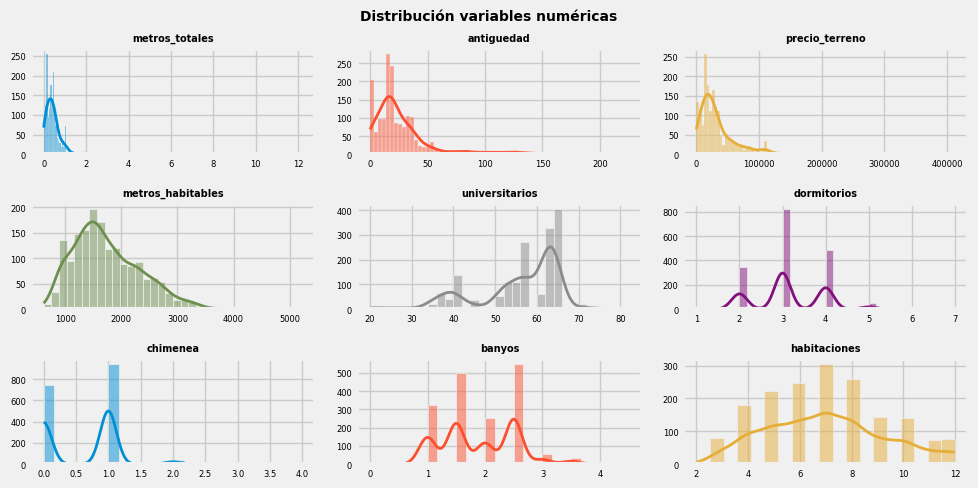

In [ ]:
#Gráfico de distribución para cada variable numérica
#----------------------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
      data     = datos,
      x        = colum,
      stat     = "count",
      kde      = True,
      color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
      line_kws = {'linewidth': 2},
      ax       = axes[i]
    )
    axes[i].set_title(colum,fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

La variable chimenea, aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoria de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

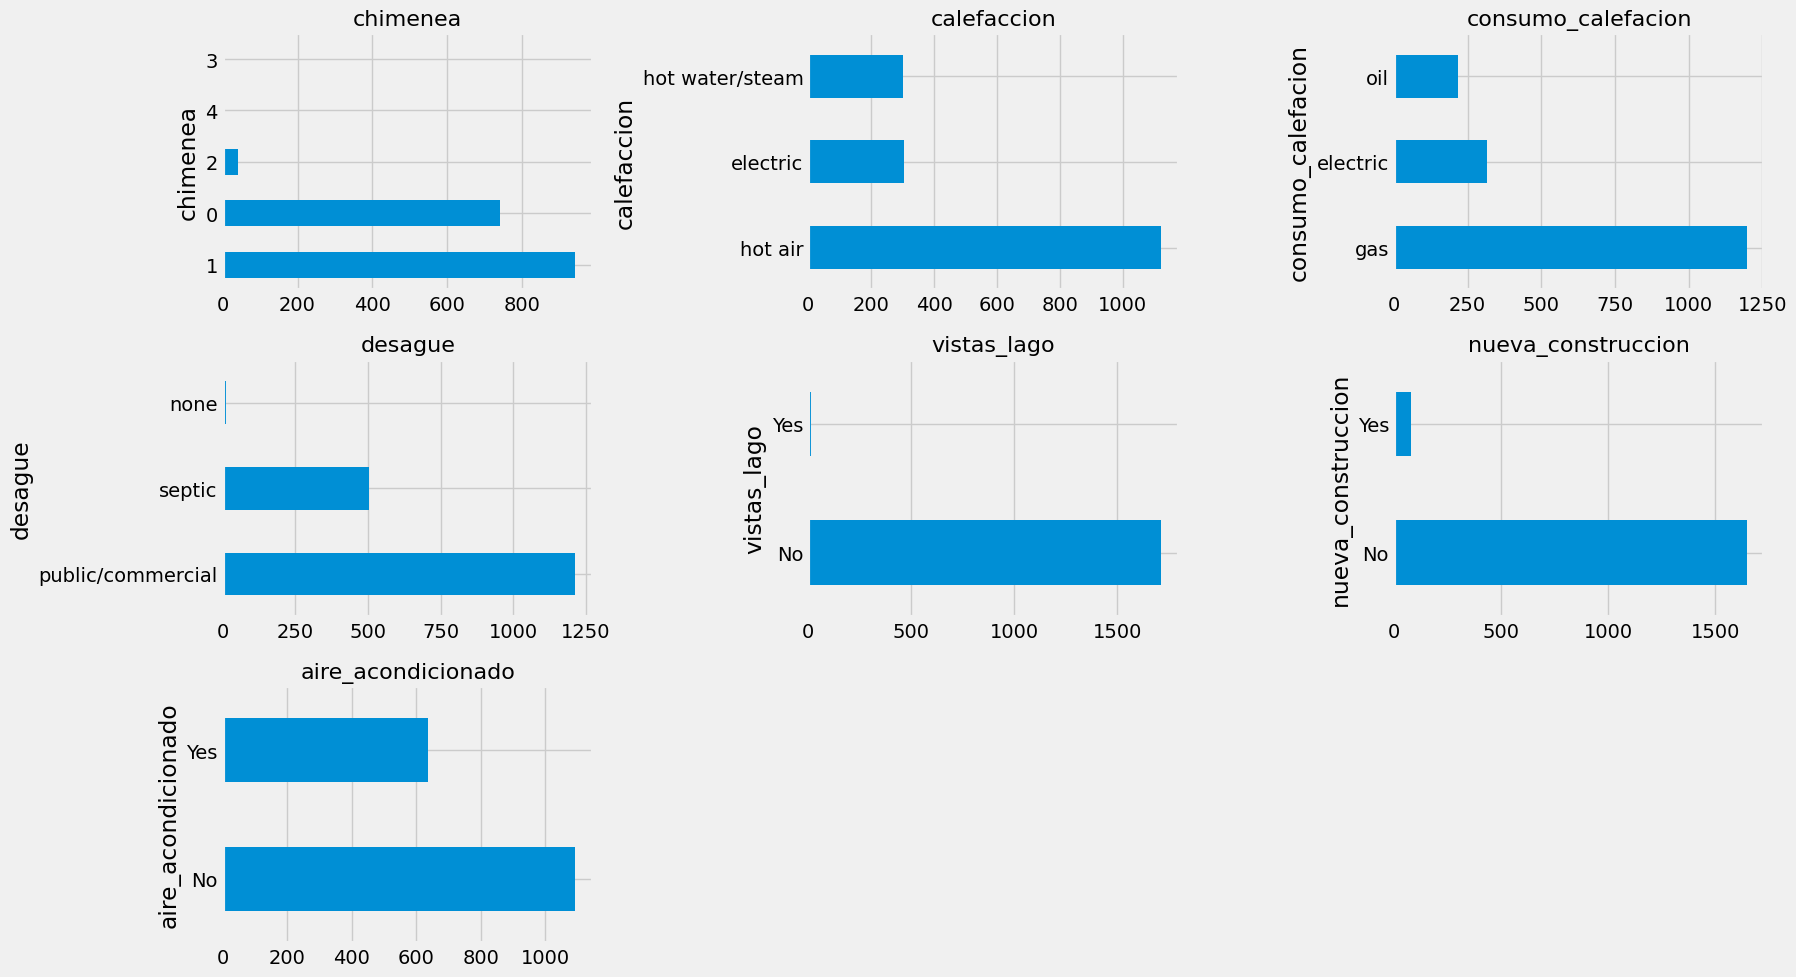

In [ ]:
#Valores observados de chimenea
#----------------------------------------------------------------------------------------------------
datos.chimenea = datos.chimenea.astype("str")
datos.chimenea.value_counts()

#Variables caualitativas (tipo object)
#----------------------------------------------------------------------------------------------------
datos.select_dtypes(include=['object']).describe()

#Grafico para cada variable cualitativa
#----------------------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,10))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
  datos[colum].value_counts().plot.barh(ax = axes[i])
  axes[i].set_title(colum, fontsize = 16)
  axes[i].set_xlabel("")

#Se eliminan los axes vacios
for i in [7, 8]:
  fig.delaxes(axes[i])

fig.tight_layout()

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. Para este caso, hay que tener precaución con la variable chimenea. Se unifican los niveles de 2, 3 y 4 en un nuevo nivel llamado "2_mas".

In [ ]:
dic_replace = {
    "2": "2_mas",
    "3": "2_mas",
    "4": "2_mas"
}

datos['chimenea'] = datos['chimenea'] \
                      .map(dic_replace) \
                      .fillna(datos[ 'chimenea'])

datos.chimenea.value_counts().sort_index()



,count
chimenea,
0,740
1,942
2_mas,46


**División train y test**

Con el objetivo de poder estimar el error que comete el modelo al predecir nuevas observaciones, se dividen los datos en dos grupos, uno de entrenamiento y otro de test (80%, 20%).


In [ ]:
# Reparto de datos en train y test
#----------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                            datos.drop('precio', axis = 'columns'),
                                            datos['precio'],
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True
                                    )

Tras realizar el reparto, se verifica que los dos grupos son similares.


In [ ]:
print("Particion de entrenamiento")
print("--------------------------")
display(y_train.describe())
display(X_train.describe())
display(X_train.describe(include = 'object'))
print(" ")

print("Partición de test")
print("--------------------------")
display(y_test.describe())
display(X_test.describe())
display(X_test.describe(include = 'object'))


Particion de entrenamiento
--------------------------


,precio
count,1382.000000
mean,211436.516643
std,96846.639129
min,10300.000000
25%,145625.000000
50%,190000.000000
75%,255000.000000
max,775000.000000


,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,0.501331,27.494211,34232.141823,1755.940666,55.439942,3.165702,1.902677,7.073082
std,0.671766,28.212721,35022.662319,621.262215,10.356656,0.825487,0.660053,2.315395
min,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,2.000000
25%,0.170000,13.000000,15100.000000,1302.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,25000.000000,1650.000000,57.000000,3.000000,2.000000,7.000000
75%,0.540000,33.750000,39200.000000,2127.250000,63.000000,4.000000,2.500000,9.000000
max,8.970000,201.000000,412600.000000,4856.000000,82.000000,7.000000,4.500000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1382,1382,1382,1382,1382,1382,1382
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,741,915,972,970,1370,1321,863


 
Partición de test
--------------------------


,precio
count,346.000000
mean,214084.395954
std,104689.155889
min,5000.000000
25%,139000.000000
50%,180750.000000
75%,271750.000000
max,670000.000000


,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.495751,29.601156,35855.491329,1751.121387,56.078035,3.109827,1.890173,6.916185
std,0.798240,32.884116,35035.761216,615.486848,10.239861,0.783575,0.652368,2.319776
min,0.010000,0.000000,300.000000,792.000000,20.000000,1.000000,1.000000,2.000000
25%,0.160000,13.000000,15100.000000,1296.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,26700.000000,1608.000000,57.000000,3.000000,2.000000,7.000000
75%,0.557500,34.000000,45950.000000,2181.000000,64.000000,4.000000,2.500000,8.000000
max,12.200000,225.000000,233000.000000,5228.000000,82.000000,6.000000,4.000000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,346,346,346,346,346,346,346
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,201,206,225,243,343,326,230


**Preprocesado**

Los modelos de redes neuronales requieren como mínimo de dos tipos de preprocesado: binarización (One hot ecoding) de las variables categóricas y estandarización de las variables continuas.


In [ ]:
# Seleccion de variables
#----------------------------------------------------------------------------------------------------
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las
# columnas cualitativas. Para mantener las columnas a las que no se les aplica
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas

numeric_cols = X_train.select_dtypes(include=[ 'float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]

                      )
# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                              steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]

                          )
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough'
)

set_config(display='diagram')
preprocessor

set_config(display='text')

# Se aprenden y aplican las transformaciones de preprocesado
#----------------------------------------------------------------------------------------------------
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Convertir el output en dataframe y añadir el nombre de las columnas
#----------------------------------------------------------------------------------------------------
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
                          .get_feature_names_out(cat_cols) # Changed get_feature_names to get_feature_names_out

labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   banyos                       1382 non-null   float64
 7   habitaciones                 1382 non-null   float64
 8   chimenea_0                   1382 non-null   float64
 9   chimenea_1                   1382 non-null   float64
 10  chimenea_2_mas               1382 non-null   float64
 11  calefaccion_electric         1382 non-null   float64
 12  calefaccion_hot air          1382 non-null   float64
 13  calefaccion_hot wa

Si bien realizar el preprocesado de forma separada del entrenamiento es útil para explorar y confirmar que las transformaciones realizadas
son las deseadas, en la práctica, es más adecuado asociarlo al propio proceso de entrenamiento. Esto puede hacerse fácilmente en los
modelos de scikit-learn con los Pipeline.


In [ ]:
#Pipeline de procesado y modelado
#----------------------------------------------------------------------------------------------------

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=[ 'float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las categorias
categorical_transformer = Pipeline(
                              steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough'
)

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1900))])

# Espacio busqueda de cada hiperparámetro
#----------------------------------------------------------------------------------------------------
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

In [ ]:
# Busqueda por validacion cruzada
#----------------------------------------------------------------------------------------------------
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5,
        verbose    = 0,
        random_state = 123,
       )

grid.fit(X= X_train, y = y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['metros_totales',
                                                                                'antiguedad',
                                                                                'precio_terreno',
                                                                                'metros_habitables',
                                                                                'universitarios',
                     

In [ ]:
# Resultados del grid
#----------------------------------------------------------------------------------------------------
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
     .drop(columns = 'params')\
     .sort_values('mean_test_score', ascending = False)\
     .head(10)
